<a href="https://colab.research.google.com/github/Pancakeisdelicious/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1033.33333333]


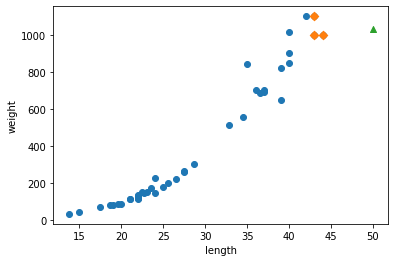

1033.3333333333333


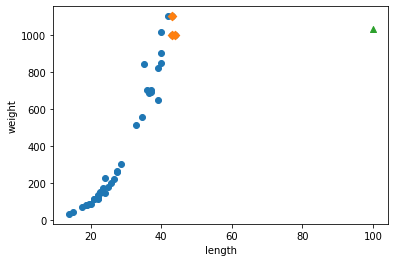

In [3]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
# 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 길이가 50cm인 농어 무게; 1033.33...


import matplotlib.pyplot as plt

# 50cm 농어 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플들만
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(np.mean(train_target[indexes])) # 여전히 1033.33




# 100cm 농어 이웃
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플들만
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



# 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_input)

# 50cm 농어 예측
print(lr.predict([[50]]))   # 1241
print(lr.coef_, lr.intercept_) # 모델 파라미터


plt.scatter(train_input, train_target)

# 15~50까지 1차 방정식 그래프 
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241,8, marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트




# 다항 회귀 
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))


lr = LinearRegression()
lr.fit(train_poly, test_poly)

print(lr.predict([[50**2, 50]])) # 1573
print(lr.coef_, lr.intercept)

# 구간별 직선 그리기 위해 15~49까지 배열
point = np.arange(15,50)

# 훈련세트, 산점도
plt.scatter(train_input, train_target)

# 15~49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
